In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import glob

# search all files inside a specific folder
# *.* means file name with any extension
dir_path = r'Data/Consumers/processed/*'
res = glob.glob(dir_path)

In [19]:
dict_df={}
sel_col=['States_UTs','Total']
for files in res:
    yr=files[-8:-4]
    
    dict_df[yr]=pd.read_csv(files,usecols=sel_col)
    print(files[-8:-4])

2020
2021
2016
2017
2015
2014


In [18]:
dict_df['2016']['States_UTs'][0]

'AndamanandNicobarIslands'

In [20]:
temp={}
for key, value_df in dict_df.items():
    temp[key]=value_df.shape[0]
key_max = max(temp, key=temp.get)

del temp[key_max]
temp_df=pd.DataFrame()
temp_df['States/UTs']=dict_df[key_max]['States_UTs']
temp_df[key_max]=dict_df[key_max]['Total']

for key,value in temp.items():
    temp_df=pd.merge(temp_df,dict_df[key],left_on='States/UTs',right_on='States_UTs',how='left')
    temp_df=temp_df.drop('States_UTs',axis=1)
    temp_df=temp_df.rename(columns={'Total':key})

temp_df['2018']=np.NaN
temp_df['2019']=np.NaN

order=['States/UTs','2014','2015','2016','2017','2018','2019','2020','2021']
temp_df=temp_df[order]

In [21]:
temp_df

,States/UTs,2014,2015,2016,2017,2018,2019,2020,2021
0,Andaman and Nicobar Islands,117046.0,119743.0,119743.0,123027.0,NaN,NaN,142243.0,141738.0
1,Andhra Pradesh,22784817.0,16230466.0,16992222.0,17295399.0,NaN,NaN,19130319.0,19315258.0
2,Arunachal Pradesh,NaN,215271.0,215271.0,213749.0,NaN,NaN,275100.0,234398.0
3,Assam,2921452.0,3301591.0,3592243.0,4029328.0,NaN,NaN,5901579.0,5901579.0
4,Bihar,4132442.0,4132442.0,4132442.0,10295411.0,NaN,NaN,15877310.0,16973233.0
5,Chandigarh,NaN,NaN,216896.0,NaN,NaN,NaN,234629.0,254413.0
6,Chhattisgarh,4041595.0,4294606.0,4517450.0,4743151.0,NaN,NaN,5759002.0,5906689.0
7,Dadra and Nagar Haveli,NaN,65182.0,66658.0,70300.0,NaN,NaN,82963.0,82963.0
8,Daman and Diu,56135.0,57704.0,59138.0,60180.0,NaN,NaN,62510.0,63404.0
9,Delhi,4856035.0,5057849.0,5336540.0,NaN,NaN,NaN,6241987.0,6412472.0


In [22]:
yearly_Cons_df=temp_df.set_index('States/UTs')
yearly_Cons_df=yearly_Cons_df.T

In [26]:
yearly_Cons_df['Total']=yearly_Cons_df.sum(axis=1)
yearly_Cons_df

States/UTs,Andaman and Nicobar Islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Dadra and Nagar Haveli,Daman and Diu,Delhi,...,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal,Total
2014,117046.0,22784817.0,NaN,2921452.0,4132442.0,NaN,4041595.0,NaN,56135.0,4856035.0,...,8112285.0,11496512.0,NaN,25871327.0,NaN,NaN,14321421.0,1143253.0,16753224.0,435170654.0
2015,119743.0,16230466.0,215271.0,3301591.0,4132442.0,NaN,4294606.0,65182.0,57704.0,5057849.0,...,8340442.0,12170509.0,93103.0,26469436.0,12367458.0,NaN,16483434.0,1890692.0,18083012.0,471237096.0
2016,119743.0,16992222.0,215271.0,3592243.0,4132442.0,216896.0,4517450.0,66658.0,59138.0,5336540.0,...,8590146.0,12990038.0,93103.0,26665722.0,12315172.0,642999.0,16483434.0,1989385.0,19454875.0,490875146.0
2017,123027.0,17295399.0,213749.0,4029328.0,10295411.0,NaN,4743151.0,70300.0,60180.0,NaN,...,8975962.0,12887496.0,108114.0,27505638.0,12916432.0,687470.0,18078478.0,1989385.0,20603460.0,512101296.0
2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2020,142243.0,19130319.0,275100.0,5901579.0,15877310.0,234629.0,5759002.0,82963.0,62510.0,6241987.0,...,9712700.0,15627639.0,116508.0,30754018.0,14947004.0,881471.0,28809347.0,2537684.0,23395511.0,628846408.0
2021,141738.0,19315258.0,234398.0,5901579.0,16973233.0,254413.0,5906689.0,82963.0,63404.0,6412472.0,...,9915496.0,15196099.0,116508.0,31638469.0,16314464.0,932715.0,29854591.0,2537684.0,24156651.0,646232082.0


<Axes: ylabel='Total'>

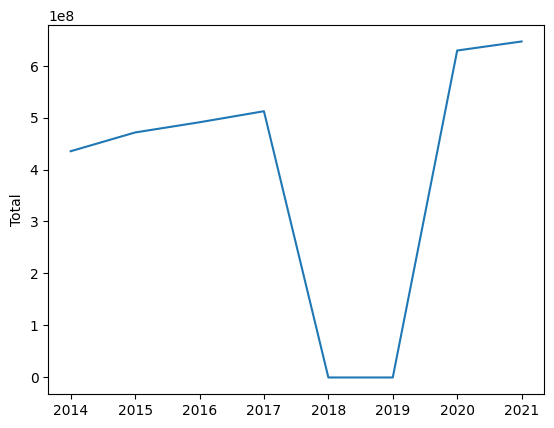

In [27]:
sns.lineplot(data=yearly_Cons_df,x=yearly_Cons_df.index,y='Total')

In [ ]:
temp_df

In [ ]:
temp_df=pd.DataFrame()
temp_df[key_max]=dict_df[key_max]['States_UTs']
temp_df['2021']=dict_df['2021']['States_UTs']
temp_df['y/n']=temp_df[key_max]==temp_df['2021']

In [ ]:
temp_df.iloc[0]['2016']

In [ ]:
dict_df['2020'].shape